## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['font.size'] = 10

print("✅ Library berhasil diimport!")

✅ Library berhasil diimport!


## 2. Load Data Hasil Imputasi (Data yang sama dengan Soal 3)

In [2]:
# Load data hasil imputasi Prophet (sama dengan Soal 3)
data = pd.read_csv('DATA/2024_prophet.csv', index_col='TANGGAL', parse_dates=True)

# Parameter yang akan diekstraksi residualnya
climate_columns = ['TAVG', 'RH_AVG', 'RR', 'FF_AVG']

param_labels = {
    'TAVG': 'Temperatur Rata-rata (°C)',
    'RH_AVG': 'Kelembapan Rata-rata (%)',
    'RR': 'Curah Hujan (mm)',
    'FF_AVG': 'Kecepatan Angin Rata-rata (m/s)'
}

print("=" * 60)
print("DATA HASIL IMPUTASI PROPHET (SAMA DENGAN SOAL 3)")
print("=" * 60)
print(f"Periode data: {data.index.min().strftime('%d-%m-%Y')} s.d. {data.index.max().strftime('%d-%m-%Y')}")
print(f"Jumlah data: {len(data)} hari")
print(f"\nPreview data:")
data[climate_columns].head(10)

DATA HASIL IMPUTASI PROPHET (SAMA DENGAN SOAL 3)
Periode data: 04-01-2024 s.d. 31-12-2024
Jumlah data: 363 hari

Preview data:


,TAVG,RH_AVG,RR,FF_AVG
TANGGAL,,,,
2024-01-04,22.5,91.0,1.600000,0
2024-01-05,23.9,82.0,32.500000,0
2024-01-06,23.4,87.0,22.500000,0
2024-01-07,22.8,90.0,9.300000,0
2024-01-08,23.8,85.0,37.200000,0
2024-01-09,23.5,86.0,2.800000,0
2024-01-10,23.6,88.0,14.300000,0
2024-01-11,22.9,91.0,61.700000,0
2024-01-12,24.5,76.0,49.300000,0


## 3. Ekstraksi Data Residual dari Dekomposisi

Menggunakan metode yang sama dengan Soal 3 (additive model, period=30) untuk mengekstrak komponen residual.

In [3]:
# ========================================
# EKSTRAKSI RESIDUAL DARI DEKOMPOSISI
# ========================================

# Membuat DataFrame kosong untuk menampung semua residual
df_residuals = pd.DataFrame(index=data.index)

print("=" * 60)
print("EKSTRAKSI DATA RESIDUAL DARI DEKOMPOSISI")
print("=" * 60)

# Period untuk dekomposisi (30 hari - bulanan)
period = 30

for column in climate_columns:
    print(f"\n📊 Memproses {column}...")
    
    # Melakukan dekomposisi
    decomposition = seasonal_decompose(data[column].dropna(), model='additive', period=period)
    
    # Mengambil resid dan menyimpannya ke kolom baru
    # Kita gunakan .resid untuk mengambil datanya
    df_residuals[f"{column}_residual"] = decomposition.resid
    
    # Tampilkan statistik residual
    resid = decomposition.resid.dropna()
    print(f"   • Jumlah data residual: {len(resid)}")
    print(f"   • Mean: {resid.mean():.6f}")
    print(f"   • Std: {resid.std():.6f}")
    print(f"   • Min: {resid.min():.6f}")
    print(f"   • Max: {resid.max():.6f}")

print("\n" + "=" * 60)
print("✅ Ekstraksi residual selesai untuk semua parameter!")
print("=" * 60)

# Tampilkan preview DataFrame residual
print("\nPreview DataFrame Residual:")
df_residuals.dropna().head(10)

EKSTRAKSI DATA RESIDUAL DARI DEKOMPOSISI

📊 Memproses TAVG...
   • Jumlah data residual: 333
   • Mean: -0.002742
   • Std: 0.732456
   • Min: -2.119026
   • Max: 1.591428

📊 Memproses RH_AVG...
   • Jumlah data residual: 333
   • Mean: 0.037420
   • Std: 5.513216
   • Min: -18.662535
   • Max: 15.034439

📊 Memproses RR...
   • Jumlah data residual: 333
   • Mean: -0.095472
   • Std: 8.605070
   • Min: -15.032406
   • Max: 53.026323

📊 Memproses FF_AVG...
   • Jumlah data residual: 333
   • Mean: 0.004242
   • Std: 0.435061
   • Min: -1.016970
   • Max: 1.213333

✅ Ekstraksi residual selesai untuk semua parameter!

Preview DataFrame Residual:


,TAVG_residual,RH_AVG_residual,RR_residual,FF_AVG_residual
TANGGAL,,,,
2024-01-19,-1.640169,6.813854,4.702069,0.188965
2024-01-20,-0.018502,-2.429202,-2.959841,0.326465
2024-01-21,0.050664,1.443021,-5.961746,0.130631
2024-01-22,0.184610,-0.770107,5.005366,0.910303
2024-01-23,-0.067208,1.725348,-6.124226,-0.756364
2024-01-24,-0.402360,1.090499,-4.091799,0.030000
2024-01-25,1.412034,-7.698895,-0.689600,-0.076061
2024-01-26,0.607489,-4.956470,-12.737240,0.364848
2024-01-27,0.692034,-3.941319,-3.279970,0.152727


## 4. Plot TAVG Residual

✅ Plot disimpan ke: DATA/plot_residual_TAVG.png


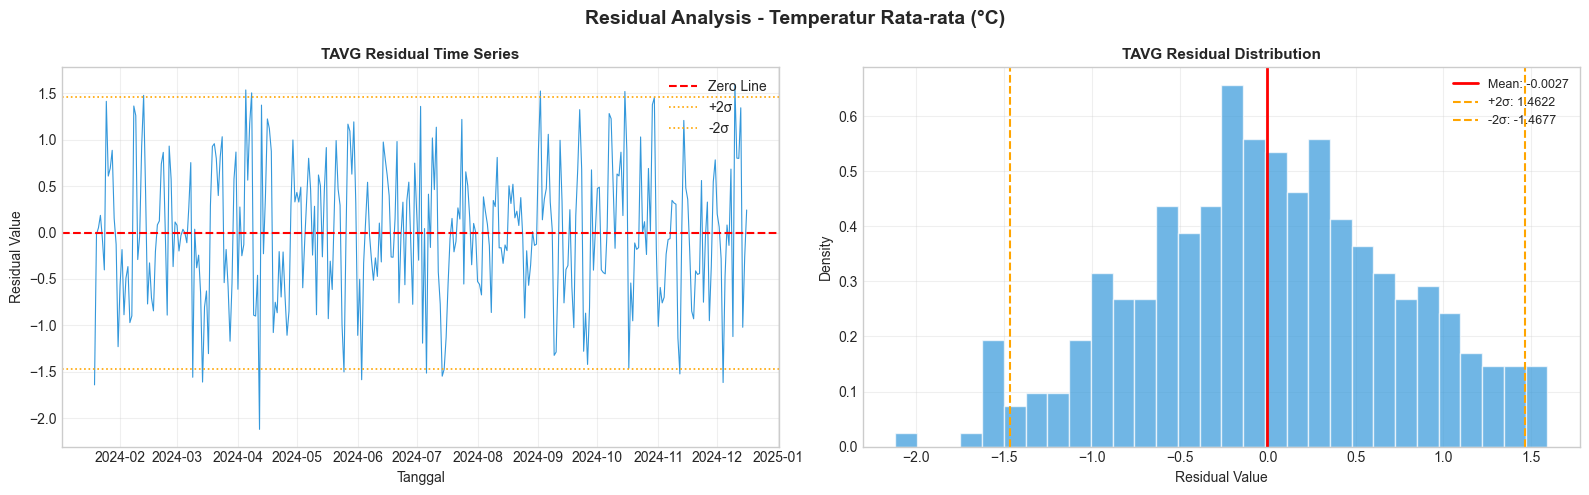

In [4]:
# ========================================
# PLOT TAVG RESIDUAL
# ========================================

col = 'TAVG'
residual = df_residuals[f'{col}_residual'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle(f'Residual Analysis - {param_labels[col]}', fontsize=14, fontweight='bold')

# Plot 1: Time Series Residual
ax1 = axes[0]
ax1.plot(residual.index, residual.values, color='#3498db', linewidth=0.8)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Zero Line')
ax1.axhline(y=residual.mean() + 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='+2σ')
ax1.axhline(y=residual.mean() - 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='-2σ')
ax1.set_title(f'{col} Residual Time Series', fontsize=11, fontweight='bold')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Residual Value')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram Residual
ax2 = axes[1]
ax2.hist(residual.values, bins=30, color='#3498db', edgecolor='white', alpha=0.7, density=True)
ax2.axvline(x=residual.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean: {residual.mean():.4f}')
ax2.axvline(x=residual.mean() + 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'+2σ: {residual.mean() + 2*residual.std():.4f}')
ax2.axvline(x=residual.mean() - 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'-2σ: {residual.mean() - 2*residual.std():.4f}')
ax2.set_title(f'{col} Residual Distribution', fontsize=11, fontweight='bold')
ax2.set_xlabel('Residual Value')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_residual_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_residual_{col}.png")
plt.show()

## 5. Plot RH_AVG Residual

✅ Plot disimpan ke: DATA/plot_residual_RH_AVG.png


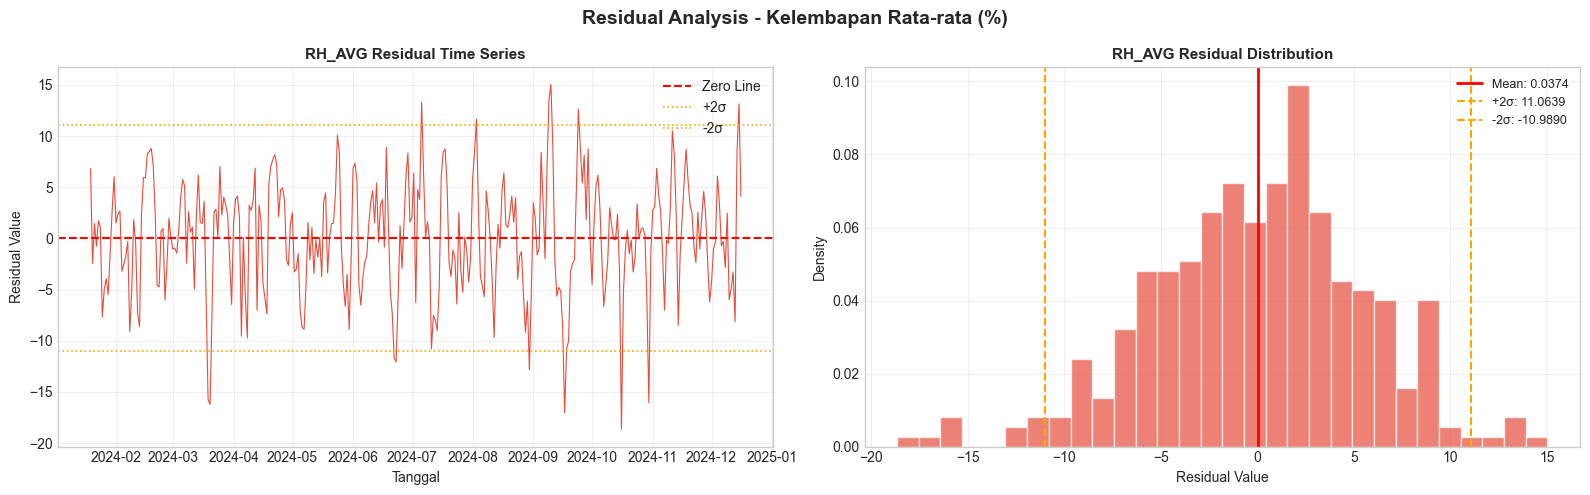

In [5]:
# ========================================
# PLOT RH_AVG RESIDUAL
# ========================================

col = 'RH_AVG'
residual = df_residuals[f'{col}_residual'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle(f'Residual Analysis - {param_labels[col]}', fontsize=14, fontweight='bold')

# Plot 1: Time Series Residual
ax1 = axes[0]
ax1.plot(residual.index, residual.values, color='#e74c3c', linewidth=0.8)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Zero Line')
ax1.axhline(y=residual.mean() + 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='+2σ')
ax1.axhline(y=residual.mean() - 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='-2σ')
ax1.set_title(f'{col} Residual Time Series', fontsize=11, fontweight='bold')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Residual Value')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram Residual
ax2 = axes[1]
ax2.hist(residual.values, bins=30, color='#e74c3c', edgecolor='white', alpha=0.7, density=True)
ax2.axvline(x=residual.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean: {residual.mean():.4f}')
ax2.axvline(x=residual.mean() + 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'+2σ: {residual.mean() + 2*residual.std():.4f}')
ax2.axvline(x=residual.mean() - 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'-2σ: {residual.mean() - 2*residual.std():.4f}')
ax2.set_title(f'{col} Residual Distribution', fontsize=11, fontweight='bold')
ax2.set_xlabel('Residual Value')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_residual_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_residual_{col}.png")
plt.show()

## 6. Plot RR Residual

✅ Plot disimpan ke: DATA/plot_residual_RR.png


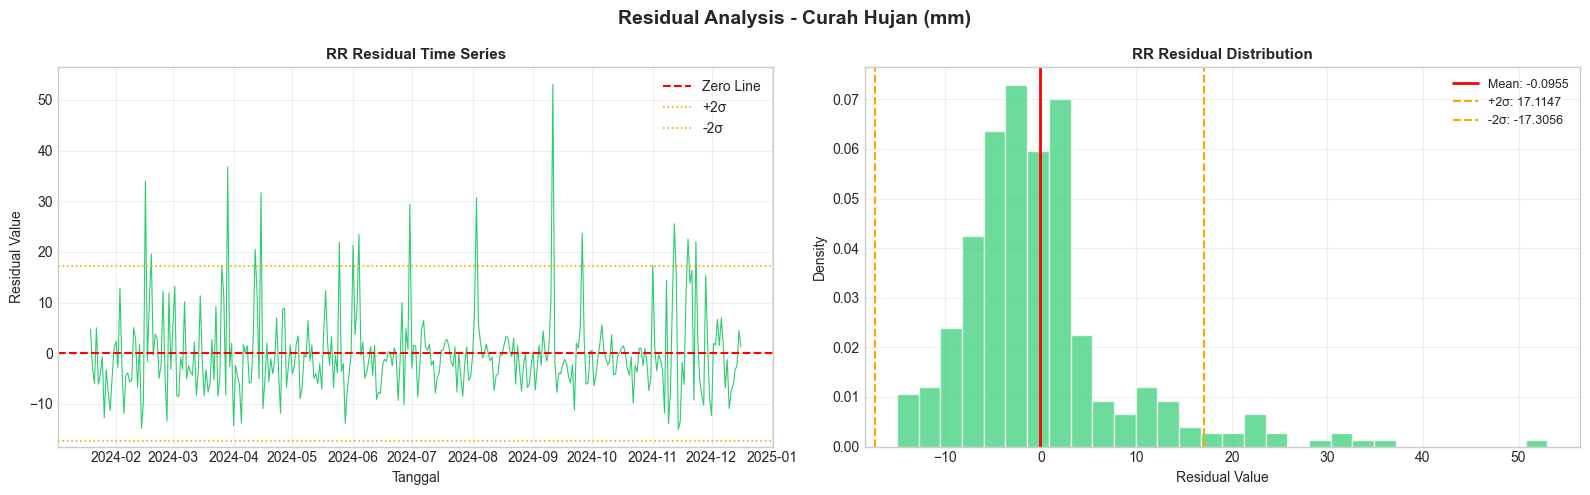

In [6]:
# ========================================
# PLOT RR RESIDUAL
# ========================================

col = 'RR'
residual = df_residuals[f'{col}_residual'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle(f'Residual Analysis - {param_labels[col]}', fontsize=14, fontweight='bold')

# Plot 1: Time Series Residual
ax1 = axes[0]
ax1.plot(residual.index, residual.values, color='#2ecc71', linewidth=0.8)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Zero Line')
ax1.axhline(y=residual.mean() + 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='+2σ')
ax1.axhline(y=residual.mean() - 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='-2σ')
ax1.set_title(f'{col} Residual Time Series', fontsize=11, fontweight='bold')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Residual Value')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram Residual
ax2 = axes[1]
ax2.hist(residual.values, bins=30, color='#2ecc71', edgecolor='white', alpha=0.7, density=True)
ax2.axvline(x=residual.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean: {residual.mean():.4f}')
ax2.axvline(x=residual.mean() + 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'+2σ: {residual.mean() + 2*residual.std():.4f}')
ax2.axvline(x=residual.mean() - 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'-2σ: {residual.mean() - 2*residual.std():.4f}')
ax2.set_title(f'{col} Residual Distribution', fontsize=11, fontweight='bold')
ax2.set_xlabel('Residual Value')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_residual_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_residual_{col}.png")
plt.show()

## 7. Plot FF_AVG Residual

✅ Plot disimpan ke: DATA/plot_residual_FF_AVG.png


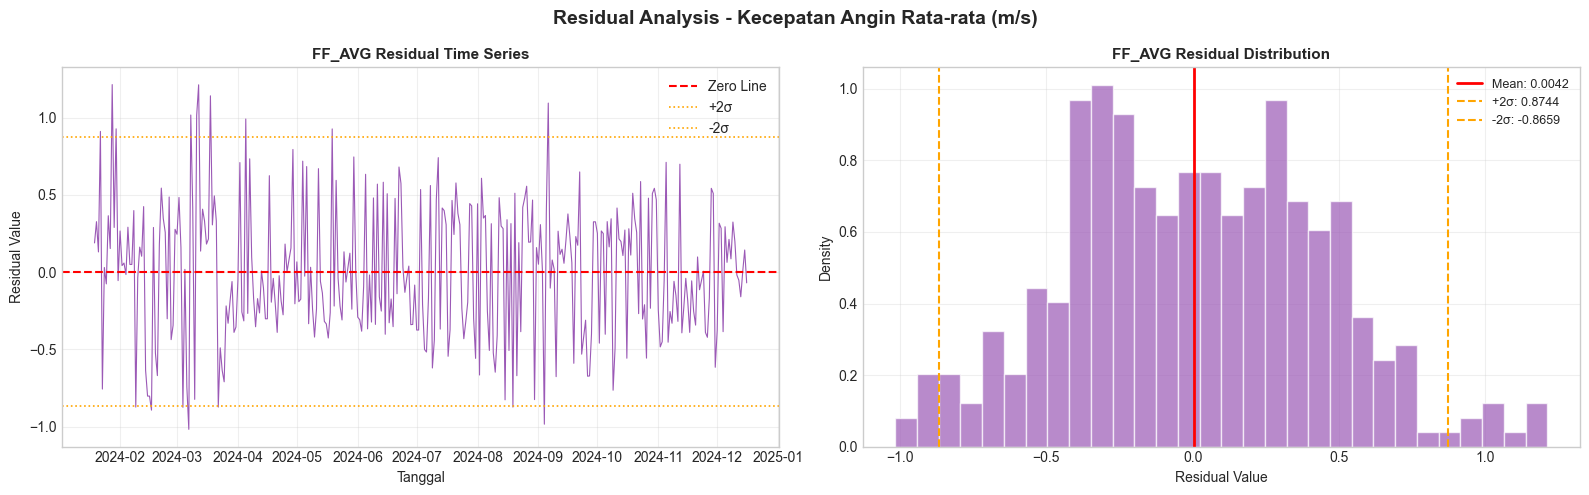

In [7]:
# ========================================
# PLOT FF_AVG RESIDUAL
# ========================================

col = 'FF_AVG'
residual = df_residuals[f'{col}_residual'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle(f'Residual Analysis - {param_labels[col]}', fontsize=14, fontweight='bold')

# Plot 1: Time Series Residual
ax1 = axes[0]
ax1.plot(residual.index, residual.values, color='#9b59b6', linewidth=0.8)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Zero Line')
ax1.axhline(y=residual.mean() + 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='+2σ')
ax1.axhline(y=residual.mean() - 2*residual.std(), color='orange', linestyle=':', linewidth=1.2, label='-2σ')
ax1.set_title(f'{col} Residual Time Series', fontsize=11, fontweight='bold')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Residual Value')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram Residual
ax2 = axes[1]
ax2.hist(residual.values, bins=30, color='#9b59b6', edgecolor='white', alpha=0.7, density=True)
ax2.axvline(x=residual.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean: {residual.mean():.4f}')
ax2.axvline(x=residual.mean() + 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'+2σ: {residual.mean() + 2*residual.std():.4f}')
ax2.axvline(x=residual.mean() - 2*residual.std(), color='orange', linestyle='--', linewidth=1.5, label=f'-2σ: {residual.mean() - 2*residual.std():.4f}')
ax2.set_title(f'{col} Residual Distribution', fontsize=11, fontweight='bold')
ax2.set_xlabel('Residual Value')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_residual_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_residual_{col}.png")
plt.show()

## 8. Perbandingan Semua Residual

✅ Plot disimpan ke: DATA/plot_all_residuals_comparison.png


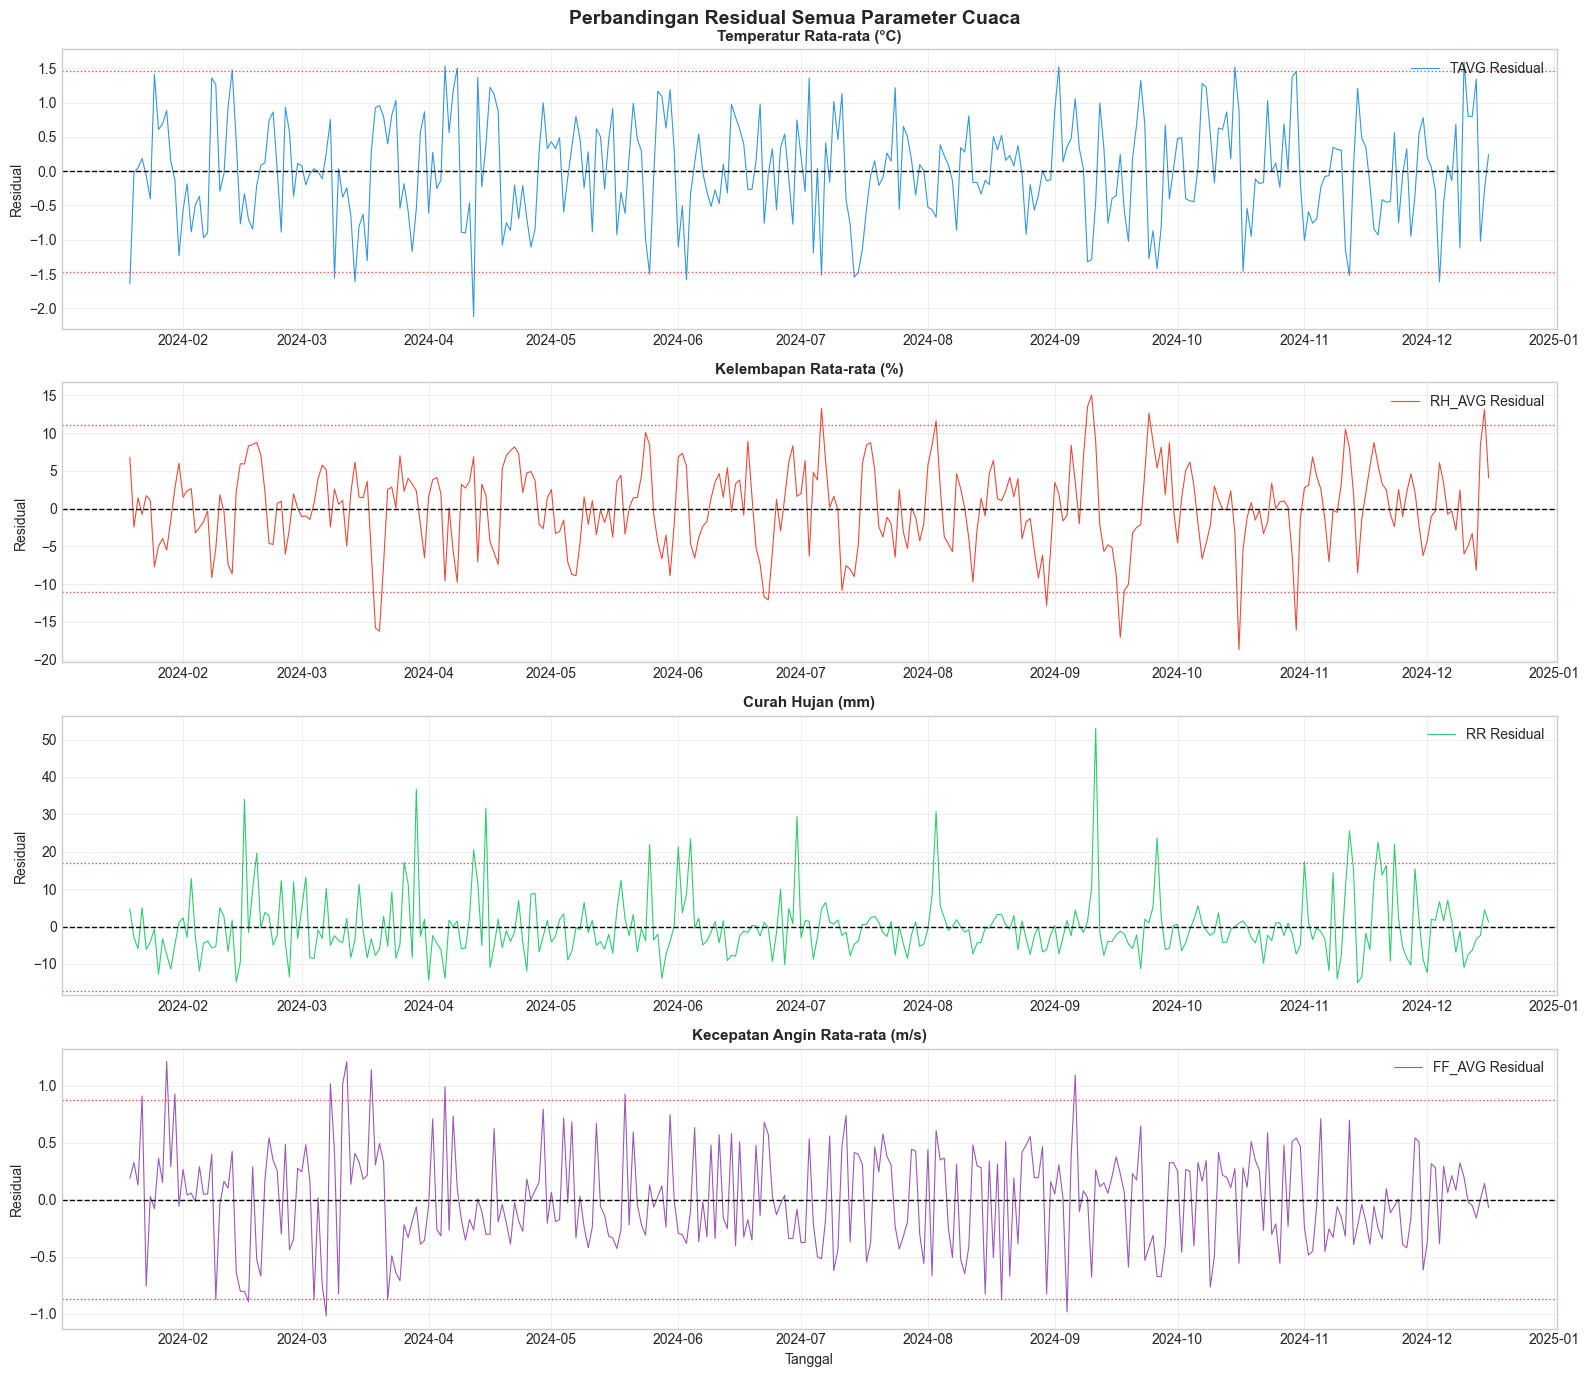

In [8]:
# ========================================
# PLOT PERBANDINGAN SEMUA RESIDUAL
# ========================================

fig, axes = plt.subplots(4, 1, figsize=(16, 14))
fig.suptitle('Perbandingan Residual Semua Parameter Cuaca', fontsize=14, fontweight='bold')

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for idx, col in enumerate(climate_columns):
    residual = df_residuals[f'{col}_residual'].dropna()
    ax = axes[idx]
    
    ax.plot(residual.index, residual.values, color=colors[idx], linewidth=0.8, label=f'{col} Residual')
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.axhline(y=residual.mean() + 2*residual.std(), color='red', linestyle=':', linewidth=1, alpha=0.7)
    ax.axhline(y=residual.mean() - 2*residual.std(), color='red', linestyle=':', linewidth=1, alpha=0.7)
    
    ax.set_title(f'{param_labels[col]}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Residual')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Tanggal')

plt.tight_layout()
plt.savefig('DATA/plot_all_residuals_comparison.png', dpi=150, bbox_inches='tight')
print("✅ Plot disimpan ke: DATA/plot_all_residuals_comparison.png")
plt.show()

## 9. Statistik Deskriptif Residual

In [9]:
# ========================================
# STATISTIK DESKRIPTIF RESIDUAL
# ========================================

print("=" * 70)
print("STATISTIK DESKRIPTIF RESIDUAL SEMUA PARAMETER")
print("=" * 70)

stats_data = []

for col in climate_columns:
    residual = df_residuals[f'{col}_residual'].dropna()
    
    stats_data.append({
        'Parameter': col,
        'Count': len(residual),
        'Mean': residual.mean(),
        'Std': residual.std(),
        'Min': residual.min(),
        'Max': residual.max(),
        'Skewness': residual.skew(),
        'Kurtosis': residual.kurtosis()
    })

stats_df = pd.DataFrame(stats_data)
stats_df.set_index('Parameter', inplace=True)

print("\n📊 Tabel Statistik Residual:")
stats_df

STATISTIK DESKRIPTIF RESIDUAL SEMUA PARAMETER

📊 Tabel Statistik Residual:


,Count,Mean,Std,Min,Max,Skewness,Kurtosis
Parameter,,,,,,,
TAVG,333,-0.002742,0.732456,-2.119026,1.591428,-0.074163,-0.370310
RH_AVG,333,0.037420,5.513216,-18.662535,15.034439,-0.302306,0.422142
RR,333,-0.095472,8.605070,-15.032406,53.026323,2.004503,6.827884
FF_AVG,333,0.004242,0.435061,-1.016970,1.213333,0.155023,-0.297050


## 10. Simpan DataFrame Residual

In [10]:
# ========================================
# SIMPAN DATAFRAME RESIDUAL
# ========================================

print("=" * 70)
print("MENYIMPAN DATA RESIDUAL")
print("=" * 70)

# Simpan DataFrame residual (dengan NaN di awal dan akhir)
df_residuals.to_csv('DATA/all_residuals.csv')
print(f"\n✅ DataFrame residual disimpan ke: DATA/all_residuals.csv")

# Simpan DataFrame residual tanpa NaN
df_residuals_clean = df_residuals.dropna()
df_residuals_clean.to_csv('DATA/all_residuals_clean.csv')
print(f"✅ DataFrame residual (tanpa NaN) disimpan ke: DATA/all_residuals_clean.csv")

# Simpan statistik
stats_df.to_csv('DATA/residual_statistics.csv')
print(f"✅ Statistik residual disimpan ke: DATA/residual_statistics.csv")

print("\n" + "-" * 70)
print("📋 Info DataFrame Residual:")
print("-" * 70)
print(f"   • Jumlah baris (dengan NaN): {len(df_residuals)}")
print(f"   • Jumlah baris (tanpa NaN): {len(df_residuals_clean)}")
print(f"   • Kolom: {list(df_residuals.columns)}")

print("\nPreview DataFrame Residual:")
df_residuals_clean.head(10)

MENYIMPAN DATA RESIDUAL

✅ DataFrame residual disimpan ke: DATA/all_residuals.csv
✅ DataFrame residual (tanpa NaN) disimpan ke: DATA/all_residuals_clean.csv
✅ Statistik residual disimpan ke: DATA/residual_statistics.csv

----------------------------------------------------------------------
📋 Info DataFrame Residual:
----------------------------------------------------------------------
   • Jumlah baris (dengan NaN): 363
   • Jumlah baris (tanpa NaN): 333
   • Kolom: ['TAVG_residual', 'RH_AVG_residual', 'RR_residual', 'FF_AVG_residual']

Preview DataFrame Residual:


,TAVG_residual,RH_AVG_residual,RR_residual,FF_AVG_residual
TANGGAL,,,,
2024-01-19,-1.640169,6.813854,4.702069,0.188965
2024-01-20,-0.018502,-2.429202,-2.959841,0.326465
2024-01-21,0.050664,1.443021,-5.961746,0.130631
2024-01-22,0.184610,-0.770107,5.005366,0.910303
2024-01-23,-0.067208,1.725348,-6.124226,-0.756364
2024-01-24,-0.402360,1.090499,-4.091799,0.030000
2024-01-25,1.412034,-7.698895,-0.689600,-0.076061
2024-01-26,0.607489,-4.956470,-12.737240,0.364848
2024-01-27,0.692034,-3.941319,-3.279970,0.152727


## 11. Kesimpulan

### Hasil Ekstraksi Residual:

Data residual telah berhasil diekstraksi dari hasil dekomposisi time series untuk semua 4 parameter cuaca:

1. **TAVG_residual** - Residual temperatur rata-rata
2. **RH_AVG_residual** - Residual kelembaban rata-rata  
3. **RR_residual** - Residual curah hujan
4. **FF_AVG_residual** - Residual kecepatan angin

### Interpretasi:

- **Residual** merupakan komponen noise/variasi yang tersisa setelah trend dan seasonal dihilangkan dari data asli
- Nilai residual yang besar (di luar ±2σ) dapat mengindikasikan **anomali** atau kejadian tidak normal
- Data residual ini akan digunakan untuk **deteksi anomali** pada Soal 5 dan 6

### Output Files:
- `DATA/all_residuals.csv` - DataFrame semua residual
- `DATA/all_residuals_clean.csv` - DataFrame residual tanpa NaN
- `DATA/residual_statistics.csv` - Statistik deskriptif residual
- `DATA/plot_residual_*.png` - Plot residual setiap parameter